<a href="https://colab.research.google.com/github/Abdelrahman26/FarmTopia-CV-Internship/blob/main/FarmTopia-CV-Internship/Anwar/NDVI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

rgb image


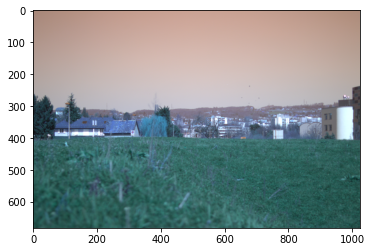

NIR image


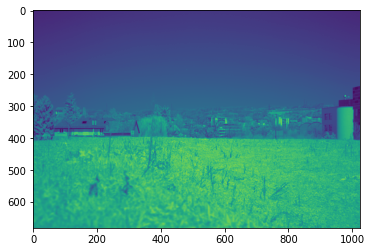

NDVI image


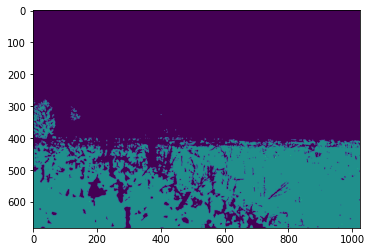

Histogram of NDVI


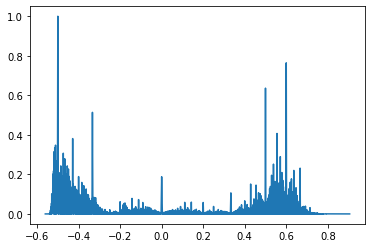

Histogram of each channals of rgb image


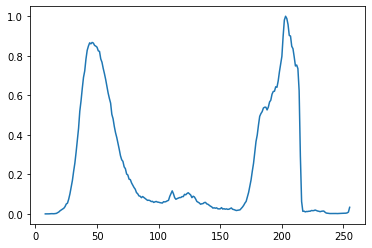

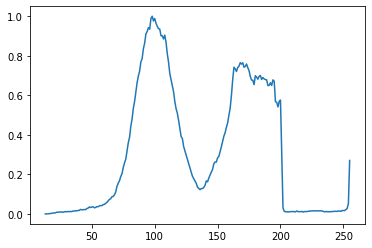

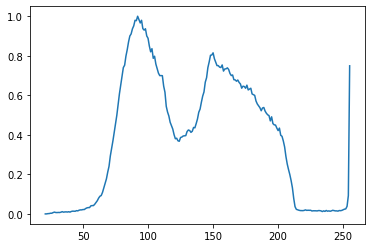

-------------------------------------------------------
-------------------------------------------------------
rgb image


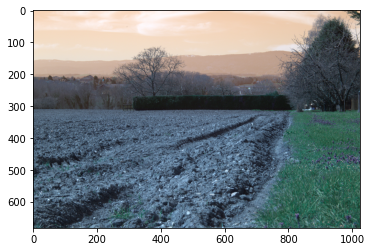

NIR image


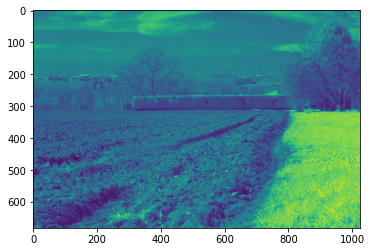

NDVI image


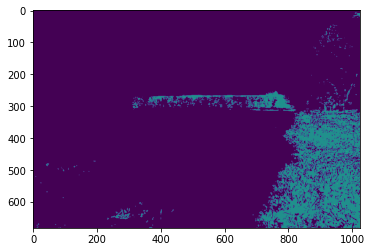

Histogram of NDVI


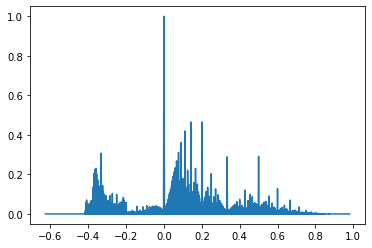

Histogram of each channals of rgb image


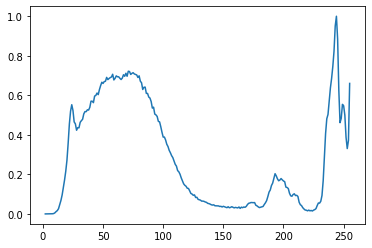

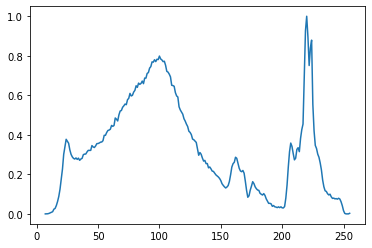

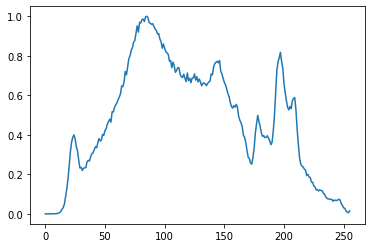

(array([[-0.38418078, -0.3802817 , -0.38547486, ..., -0.4037267 ,
         -0.4117647 , -0.4099379 ],
        [-0.38935575, -0.38764045, -0.3898305 , ..., -0.4099379 ,
         -0.4143302 , -0.40809968],
        [-0.39325842, -0.38935575, -0.3898305 , ..., -0.4099379 ,
         -0.40557274, -0.40625   ],
        ...,
        [ 0.184     ,  0.3030303 ,  0.21538462, ...,  0.71428573,
          0.5965665 ,  0.5230126 ],
        [ 0.00719424,  0.2857143 ,  0.37062937, ...,  0.6886792 ,
          0.5659574 ,  0.5084746 ],
        [ 0.22950819,  0.37704918,  0.5319149 , ...,  0.65581393,
          0.5633188 ,  0.54545456]], dtype=float32),
 array([[-0.62698412,  1.        ],
        [-0.57843137,  1.        ],
        [-0.57692307,  1.        ],
        ...,
        [ 0.96153843,  1.        ],
        [ 0.97029704,  1.        ],
        [ 0.98113209,  1.        ]]))

In [9]:
import cv2
from skimage import exposure
import matplotlib.pyplot as plt
import numpy as np
def NDVI_analysis (rgb_image_name, nir_image_name, plot = True):
  '''
  input: rgb_image_name and nir_image_name are string
          if plot = True then  plot images for analysis.
  output: NDVI map and freq of numbers in NDVI map
  '''
  np.seterr(invalid='ignore', divide  = 'ignore' )
  rgb = cv2.imread(rgb_image_name+'.tiff',cv2.COLOR_BGR2RGB)

  nir = cv2.imread(nir_image_name+'.tiff')

  r = np.array(rgb[...,0] ,dtype = np.float32 )
  nir = np.array(nir[...,0],dtype = np.float32)
  NDVI = (nir - r) / (nir + r)

  cv2.imwrite('o.jpg',NDVI)
  o = cv2.imread('o.jpg',cv2.COLOR_BGR2RGB)

  unique, counts = np.unique(NDVI, return_counts=True)
  Freq = np.array((unique, counts)).T

  if plot == True:
    print('rgb image')
    plt.imshow(rgb)
    plt.show()  

    print('NIR image')
    plt.imshow(nir)
    plt.show()

    print('NDVI image')
    plt.imshow(o)
    plt.show()

    print('Histogram of NDVI')
    plt.plot(unique,counts/counts.max())
    plt.show()

    print('Histogram of each channals of rgb image')
    for i in range(0,3):
      img_hist, bins = exposure.histogram(rgb[...,i] )
      plt.plot(bins,img_hist / img_hist.max())
      plt.show()
  
  return NDVI, Freq


NDVI_analysis('0008_rgb' , '0008_nir')
print('-------------------------------------------------------')
NDVI_analysis('0038_rgb' , '0038_nir',plot = False)#No plot
print('-------------------------------------------------------')
NDVI_analysis('0010_rgb' , '0010_nir')
